In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import cv2 as cv
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import random as rd

from utils import imread, get_P, get_silhouette, compute_F
from stereo import Stereo
from reconstruct import get_X, get_SIFT_keypoints

In [16]:
n1, n2 = 7, 8

img1 = imread(n1)
img2 = imread(n2)
h, w, _ = img1.shape

P1 = get_P(n1)
P2 = get_P(n2)

silhouette1 = get_silhouette(n1)
silhouette2 = get_silhouette(n2)

stereo = Stereo(w, h)

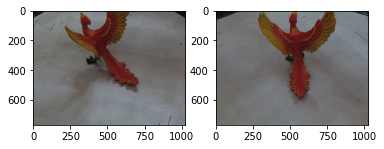

In [17]:
f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(img1)
f.add_subplot(1,2,2)
plt.imshow(img2)
plt.show()

In [18]:
F = compute_F(P1, P2)

In [19]:
x = np.array([690, 480, 1])

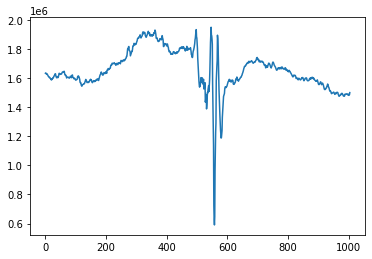

In [20]:
x2 = stereo.find_x2(x, F, img1, img2, kernel_size=[20,20], show=True)

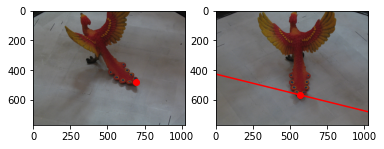

In [21]:
stereo.show_best_x2(img1, img2, x, x2, F @ x)

In [23]:
X = get_X(P1, P2, x,x2)

189 points of interest


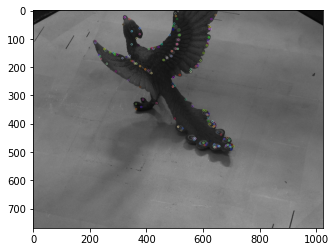

In [24]:
x_list = get_SIFT_keypoints(img1, silhouette1, show=True)
print(f"{len(x_list)} points of interest")

In [26]:
x1_x2_list = []
for x1 in tqdm(x_list):
    x2 = stereo.find_x2(x1, F, img1, img2, kernel_size=[20,20])
    if x2 is not None:
        x1_x2_list.append((x1, x2))

100%|██████████| 189/189 [00:07<00:00, 26.69it/s]


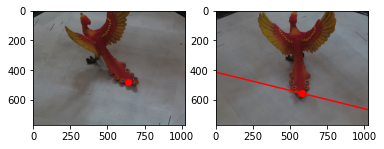

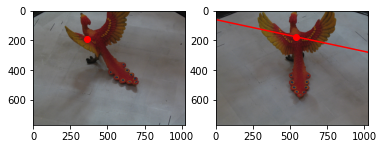

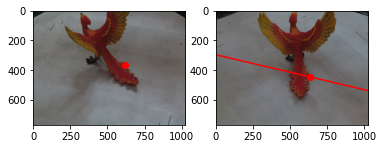

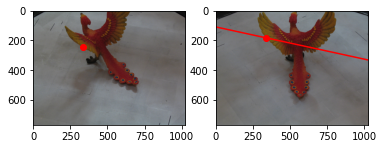

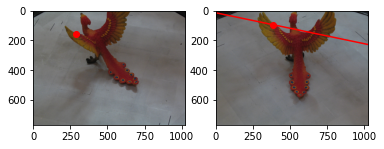

In [28]:
for x1, x2 in sorted(x1_x2_list, key=lambda k: rd.random())[:5]:
    stereo.show_best_x2(img1, img2, x1, x2, F @ x1)

In [31]:
X_list = [get_X(P1, P2, x1, x2) for x1, x2 in tqdm(x1_x2_list)]



  0%|          | 0/189 [00:00<?, ?it/s]

 22%|██▏       | 42/189 [00:00<00:00, 411.03it/s]

 45%|████▍     | 85/189 [00:00<00:00, 410.32it/s]

 72%|███████▏  | 136/189 [00:00<00:00, 429.13it/s]

100%|██████████| 189/189 [00:00<00:00, 420.34it/s]


  0%|          | 0/189 [00:17<?, ?it/s]


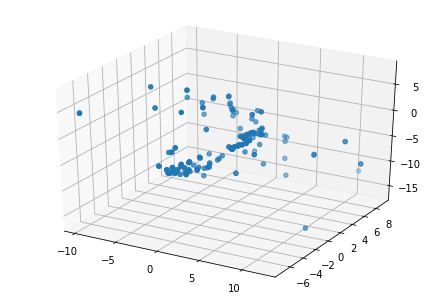

In [32]:
%matplotlib inline 
#%matplotlib notebook 
fig = plt.figure()
ax = Axes3D(fig)

X_list = np.array(X_list)
ax.scatter(X_list[:,0], X_list[:,1], X_list[:,2])